In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Megaport/Desktop/python/datos machine learning/ml-100k/u.data.csv", sep="\t", header=None)

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape

(100000, 4)

In [6]:
df.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [7]:
df.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [8]:
#Nombrar las columnas
###0 El id del usuario => UserID
### 1 identificador de la pelicula => ItemID
## Nota puesta a la pelicula => Rating
# Fecha de la valoracion en segundos desde el EPOC => TimeStamp
df.columns = ["UserID","ItemID","Ratings","TimeStamp"]

In [9]:
df.head()

,UserID,ItemID,Ratings,TimeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### Análisis exploratorio de los ítems

In [10]:
import matplotlib.pyplot as plt

(array([ 6110.,     0., 11370.,     0.,     0., 27145.,     0., 34174.,
            0., 21201.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

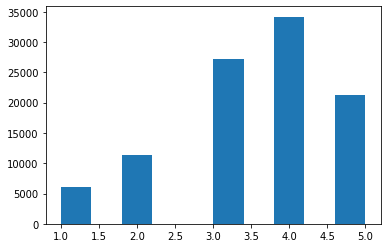

In [11]:
plt.hist(df.Ratings)

(array([11459.,  5724., 19359.,  9315.,  9396., 10083.,  6175.,  9603.,
        10048.,  8838.]),
 array([8.74724710e+08, 8.76580903e+08, 8.78437096e+08, 8.80293288e+08,
        8.82149481e+08, 8.84005674e+08, 8.85861867e+08, 8.87718060e+08,
        8.89574252e+08, 8.91430445e+08, 8.93286638e+08]),
 <a list of 10 Patch objects>)

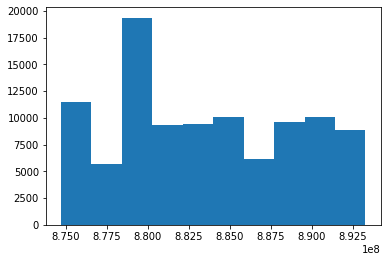

In [12]:
plt.hist(df.TimeStamp)

In [13]:
df.groupby(["Ratings"])["UserID"].count()

Ratings
1     6110
2    11370
3    27145
4    34174
5    21201
Name: UserID, dtype: int64

(array([1.146e+03, 2.490e+02, 1.390e+02, 6.700e+01, 3.800e+01, 2.400e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.2, 117.4, 175.6, 233.8, 292. , 350.2, 408.4, 466.6,
        524.8, 583. ]),
 <a list of 10 Patch objects>)

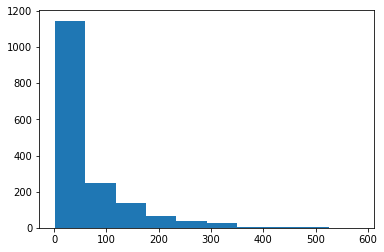

In [14]:
plt.hist(df.groupby(["ItemID"])["ItemID"].count())

### Representación en forma matricial

In [15]:
import numpy as np

In [16]:
n_user = df.UserID.unique().shape[0]
n_user

943

In [17]:
n_items = df.ItemID.unique().shape[0]
n_items

1682

In [18]:
ratings = np.zeros((n_user, n_items))

In [19]:
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]

In [20]:
type(ratings)

numpy.ndarray

In [21]:
ratings.shape

(943, 1682)

In [22]:
ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [23]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0]*ratings.shape[1])
sparsity *= 100
print("Coeficiente de sparseidad: {:4.2f}%".format(sparsity))

Coeficiente de sparseidad: 6.30%


## Crear conjuntos de entrenamientos y validación

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
ratings_train, ratings_test = train_test_split(ratings, test_size = 0.3, random_state =42)

In [26]:
ratings_train.shape

(660, 1682)

In [27]:
ratings_test.shape

(283, 1682)

## Filtro colaborativo basado en Usuarios
* Matriz de similaridad entre los usuarios (distancia del coseno) (para establecer semejanza de usuario)
* Predecir la valoración desconocida de un ítem *i* para un usuario activo *u* basandonos en la suma ponderada de 
  todas las valoraciones del resto de usuarios para dicho ítem
* Recomendaremos los nuevos ítems a los usuarios según lo establecido en los pasos anteriores

In [28]:
import sklearn

In [29]:
sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings_train)

In [30]:
type(sim_matrix)

numpy.ndarray

In [31]:
sim_matrix.shape

(660, 660)

In [32]:
sim_matrix

array([[1.        , 0.17448349, 0.18009754, ..., 0.13331459, 0.17695593,
        0.21882481],
       [0.17448349, 1.        , 0.07993097, ..., 0.07175808, 0.09552622,
        0.05512655],
       [0.18009754, 0.07993097, 1.        , ..., 0.0191736 , 0.02233385,
        0.10310785],
       ...,
       [0.13331459, 0.07175808, 0.0191736 , ..., 1.        , 0.04853428,
        0.05142508],
       [0.17695593, 0.09552622, 0.02233385, ..., 0.04853428, 1.        ,
        0.1198022 ],
       [0.21882481, 0.05512655, 0.10310785, ..., 0.05142508, 0.1198022 ,
        1.        ]])

In [33]:
user_prediction = sim_matrix.dot(ratings_train)/np.array([np.abs(sim_matrix).sum(axis=1)]).T #np.abs -> valor absoluto

In [34]:
user_prediction

array([[2.10259747e+00, 5.86975978e-01, 3.40264192e-01, ...,
        0.00000000e+00, 7.33611460e-03, 6.04379414e-03],
       [1.40999723e+00, 2.91863934e-01, 2.68085289e-01, ...,
        0.00000000e+00, 3.50378592e-03, 2.32963985e-03],
       [1.69014833e+00, 3.13648440e-01, 3.26127887e-01, ...,
        0.00000000e+00, 3.25391767e-03, 1.77210119e-03],
       ...,
       [1.73393747e+00, 4.06719333e-01, 3.21166908e-01, ...,
        0.00000000e+00, 2.71269625e-03, 9.00511411e-03],
       [2.34361031e+00, 8.10544770e-01, 4.73941025e-01, ...,
        0.00000000e+00, 1.01130066e-02, 9.66427605e-03],
       [2.36796969e+00, 5.98146138e-01, 3.85569804e-01, ...,
        0.00000000e+00, 6.39996638e-03, 5.37442746e-03]])

In [35]:
#Vamos a buscar el error cuadrático medio
from sklearn.metrics import mean_absolute_error

In [ ]:
def get_mse(preds, actuals):
    if preds.shape[0] != actuals.shape[0]:
        actuals = actuals.T
    preds = preds[actuals.nonzero()].flatten()
    actuals = actuals[actuals.nonzero()].flatten()
    return mean_absolute_error(preds, actuals)

In [37]:
get_mse(user_prediction, ratings_test)

2.7340831575424995

In [38]:
get_mse(user_prediction, ratings_train)

2.585195708341668

## Filtro colaborativo basado en los KNN

In [39]:
from sklearn.neighbors import NearestNeighbors

In [40]:
k = 8

In [41]:
neighbors = NearestNeighbors(k, 'cosine') #Aqui sacamos las similaridades uno es k y coseno

In [42]:
neighbors.fit(ratings_test)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                 radius='cosine')

In [43]:
top_k_distances, top_k_users = neighbors.kneighbors(ratings_train, return_distance=True)

In [44]:
top_k_distances.shape

(660, 8)

In [45]:
top_k_distances[0]

array([44.78839135, 45.27692569, 45.31004304, 45.43126677, 45.80392996,
       45.84757355, 45.85847795, 45.92385001])

In [46]:
top_k_users.shape

(660, 8)

In [47]:
top_k_users[0]

array([125,  45, 156,  44,  46,  57, 240,  24], dtype=int64)

In [48]:
user_predicts_k = np.zeros(ratings_train.shape)
for i in range(ratings_train.shape[0]):# PAra cada usuario del conjunto de entrenamiento
        user_predicts_k[i,:] = top_k_distances[i].T.dot(ratings_train[top_k_users][i])/np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T
    

In [49]:
user_predicts_k.shape

(660, 1682)

In [50]:
user_predicts_k

array([[2.86594736, 0.75209697, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.76815679, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.49434965, 0.        , 0.24137274, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.37180028, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.25328124, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.09852198, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [65]:
get_mse(user_predicts_k, ratings_test)

2.891222508130964

In [66]:
get_mse(user_predictions_k, ratings_train)

NameError: name 'user_predictions_k' is not defined

## Filtro colaborativo basado en ítems

In [67]:
n_movies = ratings_train.shape[1]
n_movies

1682

In [68]:
neighbors = NearestNeighbors(n_movies, 'cosine')

In [69]:
neighbors.fit(ratings_train.T)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=1682, p=2,
                 radius='cosine')

In [70]:
top_k_distances, top_k_items = neighbors.kneighbors(ratings_train.T, return_distance=True)

In [71]:
top_k_distances.shape

(1682, 1682)

In [72]:
top_k_items.shape

(1682, 1682)

In [77]:
top_k_items

array([[   0,  120,  404, ...,  285,  312,  301],
       [   1,  575,  232, ...,  257,   99,   49],
       [   2,  742, 1094, ...,  180,   99,   49],
       ...,
       [1565, 1571, 1570, ...,  180,   99,   49],
       [1680, 1671, 1582, ...,  180,   99,   49],
       [1681, 1596, 1592, ...,  180,   99,   49]], dtype=int64)

In [73]:
item_preds = ratings_train.dot(top_k_distances) / np.array([np.abs(top_k_distances).sum(axis=1)])

In [74]:
item_preds.shape

(660, 1682)

In [75]:
item_preds

array([[0.        , 0.31842643, 0.37009323, ..., 1.44850442, 1.4566397 ,
        1.54530823],
       [0.        , 0.0545379 , 0.06227954, ..., 0.20078701, 0.20112087,
        0.21332472],
       [0.        , 0.03522479, 0.04073126, ..., 0.18456903, 0.18654661,
        0.20076303],
       ...,
       [0.        , 0.08968346, 0.10313623, ..., 0.42050197, 0.4196067 ,
        0.45863507],
       [0.        , 0.25835756, 0.29918119, ..., 1.31043371, 1.32278067,
        1.41390683],
       [0.        , 0.07174777, 0.08538024, ..., 0.25535196, 0.25259645,
        0.26199652]])

In [76]:
get_mse(item_preds, ratings_train)

3.115332042749584

In [79]:
movies = df = pd.read_csv("C:/Users/Megaport/Desktop/python/datos machine learning/ml-100k/u.item.csv", sep='|', header=None, encoding = "cp1252")

In [89]:
movies.iloc[120:]

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
120,121,Independence Day (ID4) (1996),03-Jul-1996,NaN,http://us.imdb.com/M/title-exact?Independence%...,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
121,122,"Cable Guy, The (1996)",14-Jun-1996,NaN,"http://us.imdb.com/M/title-exact?Cable%20Guy,%...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,123,"Frighteners, The (1996)",19-Jul-1996,NaN,"http://us.imdb.com/M/title-exact?Frighteners,%...",0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
123,124,Lone Star (1996),21-Jun-1996,NaN,http://us.imdb.com/M/title-exact?Lone%20Star%2...,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
124,125,Phenomenon (1996),29-Jun-1996,NaN,http://us.imdb.com/M/title-exact?Phenomenon%20...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
125,126,"Spitfire Grill, The (1996)",06-Sep-1996,NaN,http://us.imdb.com/M/title-exact?Spitfire%20Gr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,127,"Godfather, The (1972)",01-Jan-1972,NaN,"http://us.imdb.com/M/title-exact?Godfather,%20...",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,128,Supercop (1992),26-Jul-1996,NaN,http://us.imdb.com/M/title-exact?Police%20Stor...,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
128,129,Bound (1996),04-Oct-1996,NaN,http://us.imdb.com/M/title-exact?Bound%20(1996),0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
129,130,Kansas City (1996),16-Aug-1996,NaN,http://us.imdb.com/M/title-exact?Kansas%20City...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## K ítemas maás cercanos o parecidos

In [90]:
k = 30
neighbors = NearestNeighbors(k, 'cosine')
neighbors.fit(ratings_train.T)
top_k_distances, top_k_items = neighbors.kneighbors(ratings_train.T, return_distance=True)

In [91]:
top_k_distances.shape

(1682, 30)

In [92]:
top_k_items[0]

array([  0, 120, 404, 116, 221, 150, 117, 180,   6, 741,  27,  94, 256,
       236, 124,  81,  24, 587, 227, 110, 234,  78, 203, 545,  70,  14,
        68, 596,  49, 143], dtype=int64)

In [93]:
top_k_distances[0]

array([ 0.        , 53.12249994, 54.38749856, 55.50675635, 56.49778757,
       56.9473441 , 57.21013896, 57.81003373, 58.10335619, 58.16356248,
       58.19793811, 58.37807808, 58.70264049, 58.83876273, 58.97457079,
       59.52310476, 59.61543424, 59.84981203, 59.89156869, 59.94163828,
       60.15812497, 60.35726965, 60.37383539, 60.63002556, 60.86049622,
       61.11464636, 61.31883887, 61.37589103, 61.57109712, 61.80614856])

In [99]:
preds = np.zeros(ratings_train.T.shape)
for i in range(ratings_train.T.shape[0]):
    if(i%50==0):
        print("iter "+str(i))
    den = 1
    if (np.abs(top_k_distances[i]).sum(axis=0)>0):
        den = np.abs(top_k_distances[i]).sum(axis=0)
    preds [i, :] = top_k_distances[i].dot(ratings_train.T[top_k_items][i])/np.array(den).T

iter 0
iter 50
iter 100
iter 150
iter 200
iter 250
iter 300
iter 350
iter 400
iter 450
iter 500
iter 550
iter 600
iter 650
iter 700
iter 750
iter 800
iter 850
iter 900
iter 950
iter 1000
iter 1050
iter 1100
iter 1150
iter 1200
iter 1250
iter 1300
iter 1350
iter 1400
iter 1450
iter 1500
iter 1550
iter 1600
iter 1650


In [ ]:
get_mse(preds, rating_train)

In [ ]:
get_mse(preds, rating_test)